In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
def format_age(x):
    if x < 1:
        return x*100
    elif x >= 1:
        return int(x)
    else:
        return 100

In [5]:
train_data["Age"] = train_data["Age"].apply(format_age)

In [6]:
x = train_data[train_data["Cabin"].isna()]

In [7]:
x["Pclass"].value_counts()

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

In [8]:
train_data = train_data.drop(columns = ["Cabin","Ticket","Fare","Name","PassengerId"])

In [9]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,100.0,1,2,S
889,1,1,male,26.0,0,0,C


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data["Embarked"] = le.fit_transform(train_data["Embarked"])
train_data["Sex"] = le.fit_transform(train_data["Sex"])

In [11]:
x_data = train_data.iloc[:,1:]
y_data = train_data.iloc[:,0]


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape,x_val.shape,y_val.shape

((569, 6), (179, 6), (569,), (179,), (143, 6), (143,))

In [13]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=5,random_state=42,criterion="log_loss",splitter="best")
dct.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, random_state=42)

In [14]:
y_pred = dct.predict(x_val)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print("Accuracy Score = ",accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Accuracy Score =  0.7972027972027972
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        87
           1       0.75      0.71      0.73        56

    accuracy                           0.80       143
   macro avg       0.79      0.78      0.79       143
weighted avg       0.80      0.80      0.80       143



<Axes: >

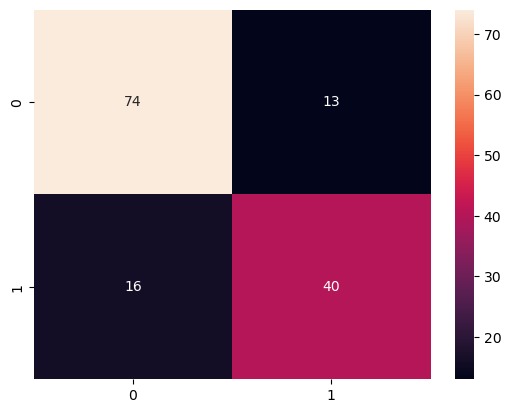

In [16]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_val,y_pred),annot = True)

Accuracy Score =  0.8181818181818182
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        87
           1       0.79      0.73      0.76        56

    accuracy                           0.82       143
   macro avg       0.81      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



/opt/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Axes: >

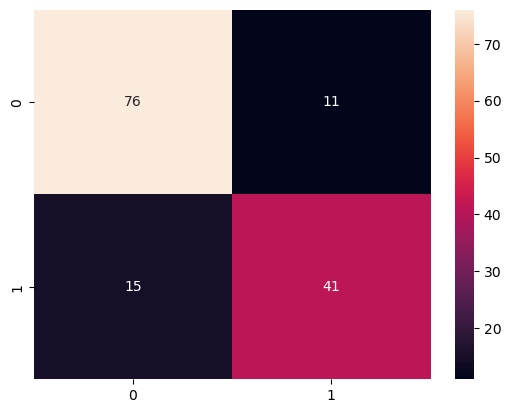

In [17]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=42,class_weight="balanced",loss="hinge",penalty="l2",C=1)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_val)

print("Accuracy Score = ",accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred),annot = True)

Accuracy Score =  0.7902097902097902
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        87
           1       0.72      0.75      0.74        56

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



<Axes: >

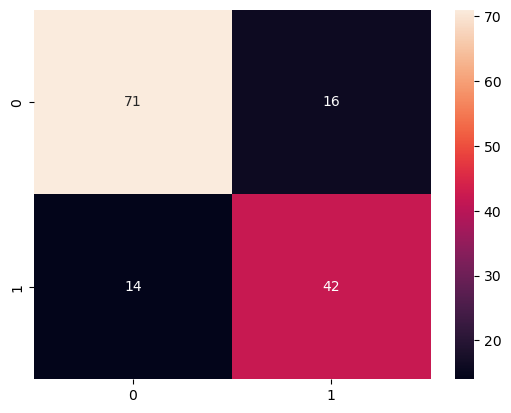

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42,C=1,n_jobs=-1,tol=1e-6,penalty="l2",max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)

print("Accuracy Score = ",accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred),annot = True)

Accuracy Score =  0.7972027972027972
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        87
           1       0.72      0.79      0.75        56

    accuracy                           0.80       143
   macro avg       0.79      0.80      0.79       143
weighted avg       0.80      0.80      0.80       143



<Axes: >

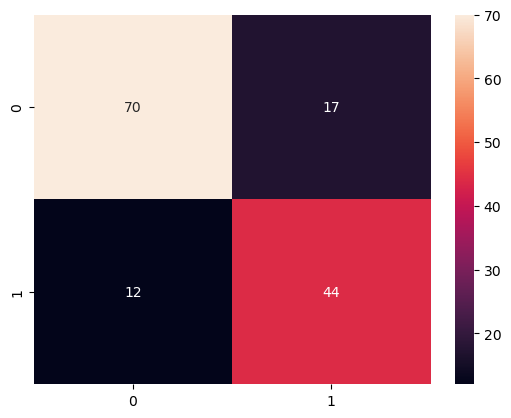

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42,class_weight="balanced",n_estimators=1000,n_jobs=-1,criterion="gini",max_depth=5)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_val)

print("Accuracy Score = ",accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred),annot = True)

Accuracy Score =  0.8251748251748252
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        87
           1       0.79      0.75      0.77        56

    accuracy                           0.83       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.83      0.82       143



<Axes: >

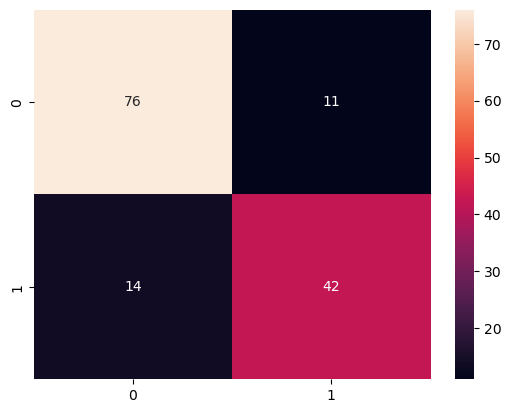

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42,objective="binary:logistic",subsample = 1)
xgb.max_delta_step = 1
xgb.n_estimators = 10000
xgb.tree_method="auto"
xgb.n_jobs = -1
xgb.scale_pos_weight=1
xgb.learning_rate = 0.01
xgb.normalize_type = "tree"
xgb.reg_lambda = 1
xgb.booster = "gbtree"
xgb.grow_policy = "lossguide"
xgb.max_depth = 5
xgb.sample_type = "weighted"
xgb.eval_metric = "logloss"
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_val)

print("Accuracy Score = ",accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))
sns.heatmap(confusion_matrix(y_val,y_pred),annot = True)

In [21]:
test_data = pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
droped_test = test_data.drop(columns = ["PassengerId","Name","Ticket","Fare","Cabin"])

In [23]:
droped_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
...,...,...,...,...,...,...
413,3,male,NaN,0,0,S
414,1,female,39.0,0,0,C
415,3,male,38.5,0,0,S
416,3,male,NaN,0,0,S


In [24]:
droped_test["Sex"] = le.fit_transform(droped_test["Sex"])
droped_test["Embarked"] = le.fit_transform(droped_test["Embarked"])

In [25]:
droped_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2
...,...,...,...,...,...,...
413,3,1,NaN,0,0,2
414,1,0,39.0,0,0,0
415,3,1,38.5,0,0,2
416,3,1,NaN,0,0,2


In [26]:
droped_test["Age"] = droped_test["Age"].apply(format_age)

In [27]:
droped_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [28]:
test_predict = xgb.predict(droped_test)

In [29]:
test_data = pd.concat([test_data,pd.DataFrame(test_predict, columns=["Survived"])],axis = 1)

In [30]:
sub = pd.read_csv("gender_submission.csv")
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
y_act = sub["Survived"]
y_pred = test_predict

In [32]:
accuracy_score(y_pred,y_act)

0.8229665071770335

In [33]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [34]:
test_data.to_csv("Submission.csv",columns=["PassengerId","Survived"],index=False)

In [35]:
pd.read_csv("Submission.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
